# Information Diffusion and Epidemics
There are two types of information diffusion models.  
1. Linear Threshold Model  
2. Independent cascade model
  
This code uses the independent cascade model to identify which person to select to maximise the number of activated people based on information diffusion.

In [1]:
import networkx as nx

# Other packages for manupulating data
import numpy as np
import pandas as pd

# packages for plotting
import matplotlib.pyplot as plt

In [2]:
edgelist_df = pd.DataFrame({'node1':['A', 'B', 'C', 'C', 'D'], 'node2':['B', 'C', 'A', 'D', 'B'], 
                            'weights':[0.5, 0.3, 0.1, 0.3, 0.4]
                           })
edgelist_df

,node1,node2,weights
0,A,B,0.5
1,B,C,0.3
2,C,A,0.1
3,C,D,0.3
4,D,B,0.4


In [3]:
g = nx.DiGraph()
for i, elrow in edgelist_df.iterrows():
    g.add_edge(elrow[0], elrow[1], weight=elrow[2])
g.edges(data=True)

OutEdgeDataView([('A', 'B', {'weight': 0.5}), ('B', 'C', {'weight': 0.3}), ('C', 'A', {'weight': 0.1}), ('C', 'D', {'weight': 0.3}), ('D', 'B', {'weight': 0.4})])

In [4]:
# for each node we are trying to fix the coordinates
g.add_node('A',pos=(1,0))
g.add_node('B',pos=(1,1))
g.add_node('C',pos=(0,0))
g.add_node('D',pos=(0,1))
g.nodes(data=True)

NodeDataView({'A': {'pos': (1, 0)}, 'B': {'pos': (1, 1)}, 'C': {'pos': (0, 0)}, 'D': {'pos': (0, 1)}})

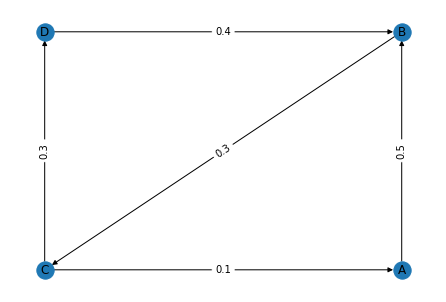

In [5]:
# This function gets the coordinates for nodes
pos = nx.get_node_attributes(g,'pos')

# This function gets the weights for the edges 
weight = nx.get_edge_attributes(g,'weight')

# The simplest way to draw a graph is by using nx.draw. 
nx.draw(g,pos, with_labels=True)

# This adds edge lables
nx.draw_networkx_edge_labels(g,pos,edge_labels = weight)
plt.show()

Starting at A, let us activate the nodes based on Independent cascade model.

In [6]:
average_length = {}
for node in g.nodes:
    num_of_act_edges = []
    for i in range(100):
        activated_edges = []
        next_edges = []
        #start from node A
        activated_edges.append(node)
        next_edges.append(node)
        while len(next_edges) > 0:
            this_edge = next_edges[0]
            for neighbour in g.neighbors(this_edge):
                if(neighbour not in activated_edges):
                    prob = nx.get_edge_attributes(g,'weight')[(this_edge, neighbour)]
                    choose_next_node = np.random.choice([0,1], p=[1-prob, prob])
                    if(choose_next_node == 1):
                        activated_edges.append(neighbour)
                        next_edges.append(neighbour)
            next_edges.remove(this_edge)
        num_of_act_edges.append(len(activated_edges))
    average_length[node] = sum(num_of_act_edges)/len(num_of_act_edges)

In [7]:
average_length

{'A': 1.73, 'B': 1.39, 'C': 1.54, 'D': 1.51}

A has the maximum number of people that will be activated. So choosing A.